<a href="https://colab.research.google.com/github/Pratyay1010/Upper-limb-movements-can-be-decoded-from-the-time--domain-of-low-frequency-EEG/blob/testing/eeg_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
pip install mne

In [2]:
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

# **Data Importing**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive/Final Year Project/Datasets/

/content/drive/MyDrive/Final Year Project/Datasets


In [5]:
ls

S01_ME/


In [6]:
from glob import glob
S01_ME_Files = glob('S01_ME/*.gdf')
#S01_MI_Files = glob('Datasets/S01/S01_MI/*.gdf')

In [7]:
S01_ME_Files

['S01_ME/motorexecution_subject1_run1.gdf',
 'S01_ME/motorexecution_subject1_run2.gdf',
 'S01_ME/motorexecution_subject1_run3.gdf',
 'S01_ME/motorexecution_subject1_run4.gdf',
 'S01_ME/motorexecution_subject1_run5.gdf',
 'S01_ME/motorexecution_subject1_run6.gdf',
 'S01_ME/motorexecution_subject1_run7.gdf',
 'S01_ME/motorexecution_subject1_run8.gdf',
 'S01_ME/motorexecution_subject1_run9.gdf',
 'S01_ME/motorexecution_subject1_run10.gdf']

##Data Testing

In [8]:
raw = mne.io.read_raw_gdf(S01_ME_Files[0], exclude=('eog-r', 'eog-m', 'eog-l','thumb_near', 'thumb_far', 'thumb_index', 'index_near', 'index_far', 'index_middle', 'middle_near', 'middle_far', 'middle_ring', 'ring_near', 'ring_far', 'ring_little', 'litte_near', 'litte_far', 'thumb_palm', 'wrist_bend', 'roll', 'pitch', 'gesture', 'handPosX', 'handPosY', 'handPosZ', 'elbowPosX', 'elbowPosY', 'elbowPosZ', 'ShoulderAdductio', 'ShoulderFlexionE', 'ShoulderRotation', 'Elbow', 'ProSupination', 'Wrist', 'GripPressure'),preload=True)

Extracting EDF parameters from /content/drive/MyDrive/Final Year Project/Datasets/S01_ME/motorexecution_subject1_run1.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg
Creating raw.info structure...


/usr/lib/python3.7/contextlib.py:119: RuntimeWarning: Channel names are not unique, found duplicates for: {'eeg'}. Applying running numbers for duplicates.
  next(self.gen)


Reading 0 ... 164863  =      0.000 ...   321.998 secs...


In [9]:
print(raw.info)

<Info | 7 non-empty values
 bads: []
 ch_names: eeg-0, eeg-1, eeg-2, eeg-3, eeg-4, eeg-5, eeg-6, eeg-7, eeg-8, ...
 chs: 61 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 256.0 Hz
 meas_date: 2015-05-26 15:42:48 UTC
 nchan: 61
 projs: []
 sfreq: 512.0 Hz
>


In [10]:
raw.to_data_frame().head(25)

,time,eeg-0,eeg-1,eeg-2,eeg-3,eeg-4,eeg-5,eeg-6,eeg-7,eeg-8,...,eeg-51,eeg-52,eeg-53,eeg-54,eeg-55,eeg-56,eeg-57,eeg-58,eeg-59,eeg-60
0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.001953,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.003906,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.005859,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.007812,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,0.009766,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,0.011719,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,0.013672,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8,0.015625,-4.086637e+09,-3.967849e+09,-4.336031e+09,-4.125436e+09,-3.864307e+09,-4.410733e+09,-5.215298e+09,-4.242579e+09,-4.227743e+09,...,-3.544387e+09,-3.384800e+09,-3.494747e+09,-3.547401e+09,-3.835159e+09,-3.633541e+09,-3.652717e+09,-3.737053e+09,-3.428939e+09,-3.626207e+09
9,0.017578,-4.094279e+09,-3.974687e+09,-4.339747e+09,-4.132001e+09,-3.870871e+09,-4.416634e+09,-5.222529e+09,-4.245489e+09,-4.230128e+09,...,-3.552893e+09,-3.395047e+09,-3.509589e+09,-3.560778e+09,-3.845707e+09,-3.641054e+09,-3.661287e+09,-3.744964e+09,-3.434537e+09,-3.632492e+09


In [11]:
events = mne.events_from_annotations(raw)

Used Annotations descriptions: ['1536', '1537', '1538', '1539', '1540', '1541', '1542', '33536', '33554', '34304', '34305', '34306', '34307', '34308', '34309', '34310', '768', '785', '786']


In [12]:
events

(array([[  2560,      0,     17],
        [  2560,      0,     18],
        [  2560,      0,     19],
        [  3584,      0,      2],
        [  5120,      0,      8],
        [  5120,      0,      9],
        [  5120,      0,     11],
        [  6187,      0,     17],
        [  6187,      0,     18],
        [  6187,      0,     19],
        [  7211,      0,      6],
        [  8747,      0,      8],
        [  8747,      0,      9],
        [  8747,      0,     15],
        [ 10122,      0,     17],
        [ 10122,      0,     18],
        [ 10122,      0,     19],
        [ 11146,      0,      7],
        [ 12682,      0,      8],
        [ 12682,      0,      9],
        [ 12682,      0,     16],
        [ 13902,      0,     17],
        [ 13902,      0,     18],
        [ 13902,      0,     19],
        [ 14926,      0,      7],
        [ 16462,      0,      8],
        [ 16462,      0,      9],
        [ 16462,      0,     16],
        [ 17568,      0,     17],
        [ 1756

In [13]:
events[0]

array([[  2560,      0,     17],
       [  2560,      0,     18],
       [  2560,      0,     19],
       [  3584,      0,      2],
       [  5120,      0,      8],
       [  5120,      0,      9],
       [  5120,      0,     11],
       [  6187,      0,     17],
       [  6187,      0,     18],
       [  6187,      0,     19],
       [  7211,      0,      6],
       [  8747,      0,      8],
       [  8747,      0,      9],
       [  8747,      0,     15],
       [ 10122,      0,     17],
       [ 10122,      0,     18],
       [ 10122,      0,     19],
       [ 11146,      0,      7],
       [ 12682,      0,      8],
       [ 12682,      0,      9],
       [ 12682,      0,     16],
       [ 13902,      0,     17],
       [ 13902,      0,     18],
       [ 13902,      0,     19],
       [ 14926,      0,      7],
       [ 16462,      0,      8],
       [ 16462,      0,      9],
       [ 16462,      0,     16],
       [ 17568,      0,     17],
       [ 17568,      0,     18],
       [ 1

In [15]:
events[1]

{'1536': 1,
 '1537': 2,
 '1538': 3,
 '1539': 4,
 '1540': 5,
 '1541': 6,
 '1542': 7,
 '33536': 8,
 '33554': 9,
 '34304': 10,
 '34305': 11,
 '34306': 12,
 '34307': 13,
 '34308': 14,
 '34309': 15,
 '34310': 16,
 '768': 17,
 '785': 18,
 '786': 19}

In [16]:
event_dir={
    'elbow flexion':1,
    'elbow extension':2,
    'supination':3,
    'pronation':4, 
    'hand close':5,
    'hand open':6,   
    'rest':7
}
event_dir

{'elbow flexion': 1,
 'elbow extension': 2,
 'supination': 3,
 'pronation': 4,
 'hand close': 5,
 'hand open': 6,
 'rest': 7}

<ipython-input-17-bc39db60976a>:2: RuntimeWarning: event 8 missing from event_id will be ignored
  first_samp=raw.first_samp)
<ipython-input-17-bc39db60976a>:2: RuntimeWarning: event 9 missing from event_id will be ignored
  first_samp=raw.first_samp)
<ipython-input-17-bc39db60976a>:2: RuntimeWarning: event 10 missing from event_id will be ignored
  first_samp=raw.first_samp)
<ipython-input-17-bc39db60976a>:2: RuntimeWarning: event 11 missing from event_id will be ignored
  first_samp=raw.first_samp)
<ipython-input-17-bc39db60976a>:2: RuntimeWarning: event 12 missing from event_id will be ignored
  first_samp=raw.first_samp)
<ipython-input-17-bc39db60976a>:2: RuntimeWarning: event 13 missing from event_id will be ignored
  first_samp=raw.first_samp)
<ipython-input-17-bc39db60976a>:2: RuntimeWarning: event 14 missing from event_id will be ignored
  first_samp=raw.first_samp)
<ipython-input-17-bc39db60976a>:2: RuntimeWarning: event 15 missing from event_id will be ignored
  first_samp=ra

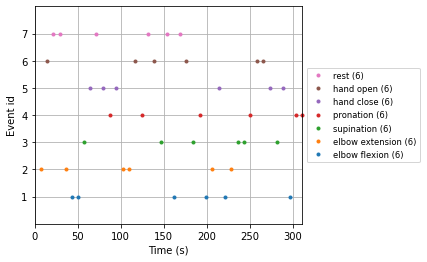

In [17]:
fig = mne.viz.plot_events(events[0], event_id=event_dir, sfreq=raw.info['sfreq'],
                          first_samp=raw.first_samp)

In [18]:
epoch = mne.Epochs(raw,events[0],event_id=[i for i in range(1,8)],tmin=-0.1,tmax=0.7)

Not setting metadata
42 matching events found
Setting baseline interval to [-0.099609375, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


In [19]:
epoch.get_data().shape

Using data from preloaded Raw for 42 events and 410 original time points ...
0 bad epochs dropped


(42, 61, 410)

In [22]:
lables=epoch.events[:,-1]
lables

array([2, 6, 7, 7, 2, 1, 1, 3, 5, 7, 5, 4, 5, 2, 2, 6, 4, 7, 6, 3, 7, 1,
       7, 6, 3, 4, 1, 2, 5, 1, 2, 3, 3, 4, 6, 6, 5, 3, 5, 1, 4, 4])

In [23]:
evoked=[]
for i in range(7):
    evoked.append(epoch[str(i+1)].average())

In [24]:
dicts={
    'elbow flexion':evoked[0],
    'elbow extension':evoked[1],
    'supination':evoked[2],
    'pronation':evoked[3],
    'hand close':evoked[4],
    'hand open':evoked[5],   
    'rest':evoked[6],
}

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


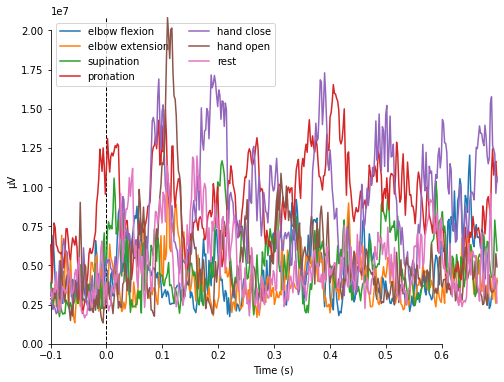

[<Figure size 576x432 with 1 Axes>]

In [25]:
mne.viz.plot_compare_evokeds(dicts) 

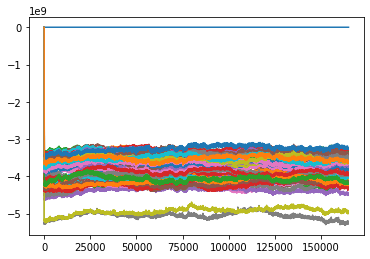

In [ ]:
plt.plot(raw.to_data_frame())
plt.show()

In [ ]:
raw.to_data_frame().shape, filtered_data.shape

((164864, 62), (164864, 62))

##Filtering
###Bandpass Filter

In [ ]:
def bandpassfilter(signal):

  fs=240.0
  lowcut=0.3
  highcut=70.0

  nyq=0.5*fs
  low=lowcut/nyq
  high=highcut/nyq

  order=2

  b,a = scipy.signal.butter(order, [low,high], 'bandpass', analog=False)
  y = scipy.signal.filtfilt(b,a,signal,axis=0)

  return y

##Preprocessing
###Power Spectral Density

##Data Manipulation

In [ ]:
def read_data(path):
    raw = mne.io.read_raw_gdf(path,exclude=('eog-r', 'eog-m', 'eog-l','thumb_near', 'thumb_far', 'thumb_index', 'index_near', 'index_far', 'index_middle', 'middle_near', 'middle_far', 'middle_ring', 'ring_near', 'ring_far', 'ring_little', 'litte_near', 'litte_far', 'thumb_palm', 'wrist_bend', 'roll', 'pitch', 'gesture', 'handPosX', 'handPosY', 'handPosZ', 'elbowPosX', 'elbowPosY', 'elbowPosZ', 'ShoulderAdductio', 'ShoulderFlexionE', 'ShoulderRotation', 'Elbow', 'ProSupination', 'Wrist', 'GripPressure'),preload=True)
    raw.set_eeg_reference()
    events = mne.events_from_annotations(raw)
    epoch = mne.Epochs(raw,events[0],event_id=[i for i in range(1,8)],tmin=-0.1,tmax=0.7, on_missing='warn')
    lables=epoch.events[:,-1]
    features=epoch.get_data()
    filtered_data = bandpassfilter(features)
    return lables,filtered_data

##Data Concatenetination of all Files(ME)

In [ ]:
%%capture
l1,f1 = read_data(S01_ME_Files[0])
l2,f2 = read_data(S01_ME_Files[1])

labels = np.concatenate((l1,l2))
features = np.vstack((f1,f2))

for i in range(2,10):
  l,f = read_data(S01_ME_Files[i])

  labels = np.concatenate((labels,l))
  features = np.vstack((features,f))

In [ ]:
features = np.moveaxis(features,1,2)

In [ ]:
print(l.shape,f.shape)
print(labels.shape,features.shape)

(42,) (42, 61, 410)
(420,) (420, 410, 61)


In [ ]:
features_final = features.reshape(-1,features.shape[-1])
features_final.shape, labels.shape

((172200, 61), (420,))

In [ ]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((336, 61, 410), (84, 61, 410), (336,), (84,))

In [ ]:
temp = np.moveaxis(X_train,2,0)
X_train_final = temp[0]

temp = np.moveaxis(X_test,2,0)
X_test_final = temp[0]

##SVM

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train_final,y_train)

SVR()

In [ ]:
regressor.score(X_test_final,y_test)

-0.17821769990966496

In [ ]:
#Accuraccy
print(regressor.score(X_test_final,y_test)*100)

-17.821769990966494


##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train_final, y_train)
clf.predict(X_test_final)
clf.predict_proba(X_test_final)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([[2.38341513e-01, 8.37978417e-02, 1.47818959e-02, 7.28964071e-02,
        4.88767462e-01, 6.96621956e-02, 3.17526844e-02],
       [2.97883207e-02, 7.00133624e-01, 8.53708695e-03, 5.73698334e-03,
        3.47719402e-02, 1.80881748e-01, 4.01502970e-02],
       [4.61749004e-02, 4.31665554e-02, 2.85216643e-02, 6.75022184e-02,
        2.95616366e-01, 4.69413853e-01, 4.96044426e-02],
       [1.33206672e-01, 8.22864057e-02, 2.09093579e-01, 3.55573163e-01,
        6.03646142e-02, 1.04142291e-01, 5.53332738e-02],
       [8.15601389e-02, 1.87008689e-01, 9.54222181e-02, 5.79614320e-03,
        2.63322106e-01, 2.07403545e-01, 1.59487160e-01],
       [6.17566716e-01, 1.98928941e-01, 1.49102637e-02, 1.82695507e-02,
        1.22118081e-01, 1.75458658e-03, 2.64518611e-02],
       [1.15202527e-02, 9.79249891e-03, 1.31939220e-02, 1.06964924e-01,
        2.54693338e-02, 4.02350298e-02, 7.92824039e-01],
       [3.22649630e-01, 4.91172724e-02, 1.44329218e-02, 2.32557261e-01,
        2.66007767e-02, 3

In [ ]:
X_test_final.shape, y_test.shape

((84, 61), (84,))

In [ ]:
clf.score(X_test_final, y_test)*100

5.952380952380952

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(p=1)
clf.fit(X_train[:,:,-1], y_train)
predictions = clf.predict(X_test_final)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions)*100,'%')

15.476190476190476 %


##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

rf.fit(X_train_final, y_train);

In [ ]:
predictions = rf.predict(X_test_final)

errors = abs(predictions - y_test)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 1.68 degrees.


In [ ]:
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 35.17 %.
